Q. Design and implement a solution for a suitable problem using Deep Learning (Probabilistic) models and techniques.
The objective is to explore, analyze, and apply concepts Deep learning (Probabilistic) models  .
You are expected to choose a problem of interest, such as classification, prediction, anomaly detection, or data generation and many more and solve it using 2-3 techniques. This may involve building models, training and testing them on appropriate datasets, and evaluating their performance.

##  Project Title - "Fraud Detection Using Probabilistic Deep Learning Models"

## Problem Statement

Detect fraudulent credit card transactions using deep learning models that can quantify prediction uncertainty and identify anomalies effectively.

## Techniques Used

1. Monte Carlo Dropout (MC Dropout) – for uncertainty-based classification

2. Ensemble Neural Networks (Ensemble NN) – for robust probabilistic prediction

3. Variational Autoencoder (VAE) – for anomaly detection using reconstruction error

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("creditcard.csv")

# Drop rows with NaN values
df = df.dropna()

# Features and labels
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Handle imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (113948, 30) Test shape: (28488, 30)


## 1st technique - Monte Carlo Dropout (Approximate Bayesian Inference)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Define MC Dropout Model
def build_mc_dropout_model(input_dim):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train model
mc_model = build_mc_dropout_model(X_train.shape[1])
mc_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

# MC Dropout prediction with uncertainty
def mc_dropout_predict(model, X, T=50):
    predictions = np.array([model(X, training=True) for _ in range(T)])
    pred_mean = predictions.mean(axis=0)
    pred_std = predictions.std(axis=0)
    return pred_mean, pred_std

pred_mean, pred_std = mc_dropout_predict(mc_model, X_test)

# Example: show predictions with uncertainty
for i in range(5):
    print(f"Predicted Probability: {pred_mean[i][0]:.4f}, Uncertainty: {pred_std[i][0]:.4f}")

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1425/1425 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9128 - loss: 0.2094 - val_accuracy: 0.9956 - val_loss: 0.0213
Epoch 2/30
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9927 - loss: 0.0305 - val_accuracy: 0.9990 - val_loss: 0.0071
Epoch 3/30
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9973 - loss: 0.0144 - val_accuracy: 0.9994 - val_loss: 0.0048
Epoch 4/30
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9982 - loss: 0.0102 - val_accuracy: 0.9996 - val_loss: 0.0042
Epoch 5/30
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9986 - loss: 0.0081 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 6/30
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9987 - loss: 0.0067 - val_accuracy: 0.9996 - val_loss: 0.0039
Epoch 7/30
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9990 - loss: 0.0067 - val_accuracy: 0.9996 - val_loss: 0.0023
Epoch 8/30
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9988 - loss: 0.0065 - val_accurac

## 2nd technique - Probabilistic Neural Network using Ensemble Method

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Function to build a standard neural network
def build_nn(input_dim):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train an ensemble of 5 neural networks
ensemble_size = 5
ensemble_models = []

for i in range(ensemble_size):
    print(f"Training model {i+1}/{ensemble_size}")
    model = build_nn(X_train.shape[1])
    model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, verbose=0)
    ensemble_models.append(model)

# Predict with ensemble
def ensemble_predict(models, X):
    preds = np.array([model.predict(X, verbose=0) for model in models])
    pred_mean = preds.mean(axis=0)
    pred_std = preds.std(axis=0)
    return pred_mean, pred_std

ensemble_mean, ensemble_std = ensemble_predict(ensemble_models, X_test)

# Example: first 5 predictions
for i in range(5):
    print(f"Predicted Probability: {ensemble_mean[i][0]:.4f}, Uncertainty: {ensemble_std[i][0]:.4f}")

Training model 1/5
Training model 2/5
Training model 3/5
Training model 4/5
Training model 5/5
Predicted Probability: 1.0000, Uncertainty: 0.0000
Predicted Probability: 1.0000, Uncertainty: 0.0000
Predicted Probability: 0.9936, Uncertainty: 0.0119
Predicted Probability: 0.9995, Uncertainty: 0.0004
Predicted Probability: 0.0000, Uncertainty: 0.0000


## 3rd technique - Variational Autoencoder (Anomaly Detection)

In [ ]:
from tensorflow.keras import layers, Model
import tensorflow as tf
import numpy as np

input_dim = X_train.shape[1]
latent_dim = 16

# VAE Loss Layer
class VAELossLayer(layers.Layer):
    def call(self, inputs, outputs, z_mean, z_log_var):
        reconstruction_loss = tf.reduce_mean(tf.square(inputs - outputs))
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        vae_loss = reconstruction_loss + kl_loss
        self.add_loss(vae_loss)
        return outputs # Pass outputs through

# Encoder
inputs = layers.Input(shape=(input_dim,))
h = layers.Dense(32, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_h = layers.Dense(32, activation='relu')
decoder_out = layers.Dense(input_dim, activation='sigmoid')
h_decoded = decoder_h(z)
outputs = decoder_out(h_decoded)

# Add VAE Loss Layer
vae_loss_layer = VAELossLayer()
outputs_with_loss = vae_loss_layer(inputs, outputs, z_mean, z_log_var)


vae = Model(inputs, outputs_with_loss)

vae.compile(optimizer='adam')

# Train VAE
vae.fit(X_train, X_train, epochs=50, batch_size=64, validation_split=0.2)

# Compute reconstruction error on test set
reconstructions = vae.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - reconstructions), axis=1)

# Flag anomalies
threshold = np.percentile(reconstruction_error, 95)  # top 5% errors
anomalies = reconstruction_error > threshold
print("Detected anomalies:", np.sum(anomalies))

Epoch 1/50
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 39.8467 - val_loss: 13.2328
Epoch 2/50
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.7115 - val_loss: 12.6541
Epoch 3/50
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.6649 - val_loss: 12.5729
Epoch 4/50
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.5431 - val_loss: 12.5345
Epoch 5/50
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.4992 - val_loss: 12.5032
Epoch 6/50
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12.5340 - val_loss: 12.4815
Epoch 7/50
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.4897 - val_loss: 12.4667
Epoch 8/50
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.6855 - val_loss: 12.4555
Epoch 9/50
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 12.4336 - val_loss: 12.4477
Epoch 10/50
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.4384 - val_loss: 12.4441
Epoch 11/50
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12.4491 - val_loss: 12.4379
Epoch 12

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Binary classification threshold for MC Dropout & BNN
y_pred_mc = (pred_mean > 0.5).astype(int)
y_pred_ensemble = (ensemble_mean > 0.5).astype(int)

# Evaluation
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred))

print("MC Dropout Evaluation:")
evaluate_model(y_test, y_pred_mc)

print("\nEnsemble NN Evaluation::")
evaluate_model(y_test, y_pred_ensemble)

# Anomaly Detection evaluation
y_test_anomaly = y_test  # 1 = fraud
print("\nVAE Anomaly Detection:")
print("Precision:", precision_score(y_test_anomaly, anomalies))
print("Recall:", recall_score(y_test_anomaly, anomalies))
print("F1-Score:", f1_score(y_test_anomaly, anomalies))


MC Dropout Evaluation:
Accuracy: 0.9995436675091266
Precision: 0.9990917982394858
Recall: 1.0
F1-Score: 0.9995456928184518
ROC-AUC: 0.9995418340734475

Ensemble NN Evaluation::
Accuracy: 0.9998946925021062
Precision: 0.9997902684563759
Recall: 1.0
F1-Score: 0.9998951232302045
ROC-AUC: 0.9998942694015649

VAE Anomaly Detection:
Precision: 0.9957894736842106
Recall: 0.09922383050136355
F1-Score: 0.1804654711942007


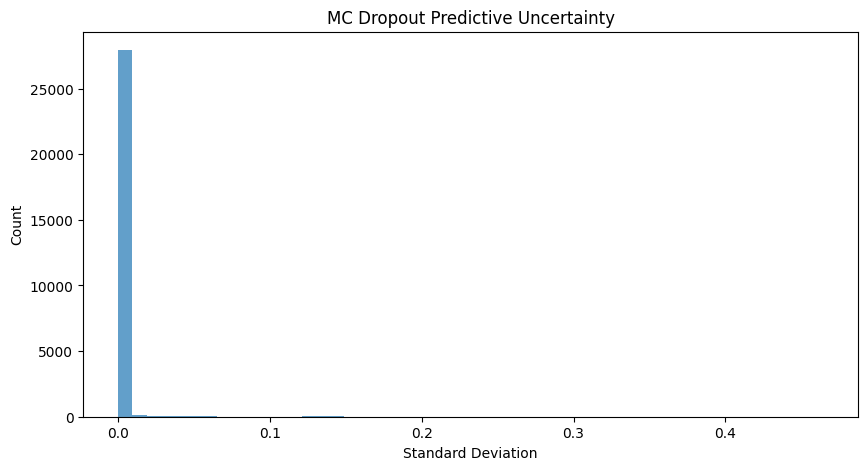

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(pred_std, bins=50, alpha=0.7)
plt.title("MC Dropout Predictive Uncertainty")
plt.xlabel("Standard Deviation")
plt.ylabel("Count")
plt.show()

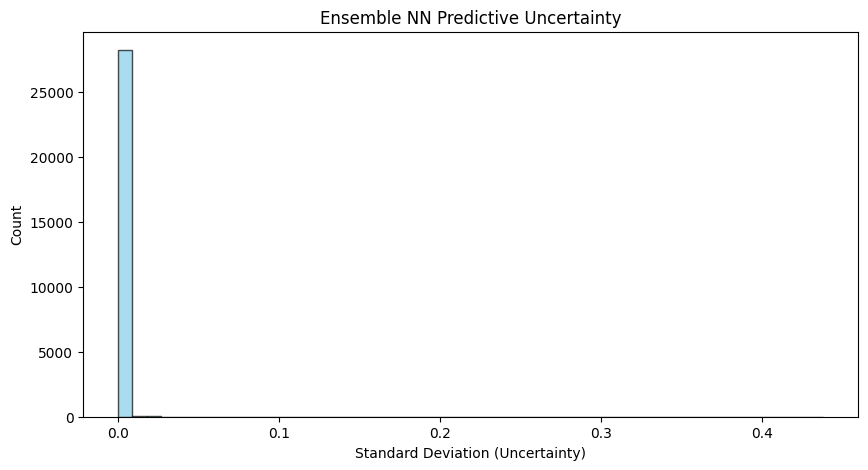

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(ensemble_std, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Ensemble NN Predictive Uncertainty")
plt.xlabel("Standard Deviation (Uncertainty)")
plt.ylabel("Count")
plt.show()

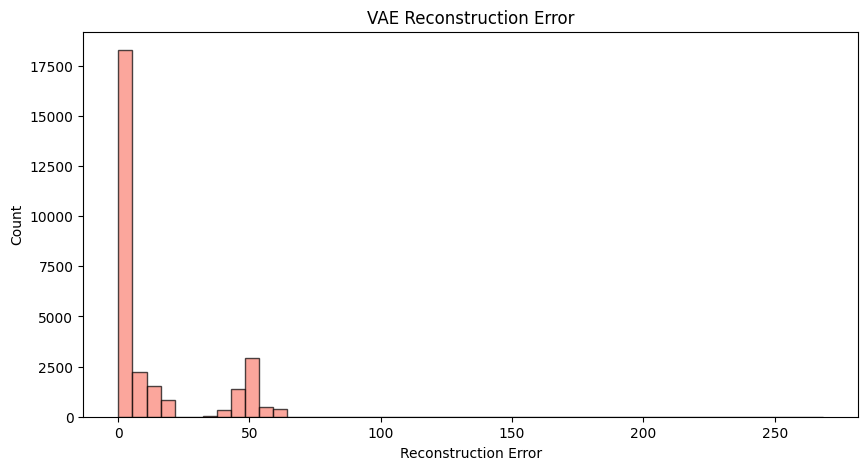

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(reconstruction_error, bins=50, alpha=0.7, color='salmon', edgecolor='black')
plt.title("VAE Reconstruction Error")
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.show()